In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [2]:
file_path = ['/kaggle/input/nhanes/demographic.csv','/kaggle/input/nhanes/diet.csv','/kaggle/input/nhanes/examination.csv','/kaggle/input/nhanes/labs.csv','/kaggle/input/nhanes/questionnaire.csv']

In [3]:
df_name = ["demographic","diet","examination","labs","questionaire"]

In [4]:
open_file = [pd.read_csv(i) for i in file_path]

In [5]:
my_dict = dict(zip(df_name,open_file))

In [6]:
Xs = {k: v for k, v in my_dict.items() if k in ['demographic', 'examination', 'labs']}

dfs = Xs.values()

In [7]:
from functools import partial, reduce 
inner_merge = partial(pd.merge, how='inner', on='SEQN') 

c = reduce(inner_merge, dfs)
c

# check if there are duplicated SEQN
c.SEQN.duplicated().value_counts()

False    9813
Name: SEQN, dtype: int64

In [8]:
# show combined df
combined_df = my_dict['questionaire'][['SEQN','MCQ160F']]
combined_df


SEQN  MCQ160F
0      73557      1.0
1      73558      2.0
2      73559      2.0
3      73560      NaN
4      73561      2.0
...      ...      ...
10170  83727      2.0
10171  83728      NaN
10172  83729      2.0
10173  83730      NaN
10174  83731      NaN

[10175 rows x 2 columns]

In [9]:
c = pd.merge(c,combined_df, how='left', on='SEQN')
c

SEQN  URXUMA  URXUMS  URXUCR.x   URXCRS  URDACT     WTSAF2YR.x  LBXAPB  \
0     73557     4.3     4.3      39.0   3447.6   11.03            NaN     NaN   
1     73558   153.0   153.0      50.0   4420.0  306.00            NaN     NaN   
2     73559    11.9    11.9     113.0   9989.2   10.53  142196.890197    57.0   
3     73560    16.0    16.0      76.0   6718.4   21.05            NaN     NaN   
4     73561   255.0   255.0     147.0  12994.8  173.47  142266.006548    92.0   
...     ...     ...     ...       ...      ...     ...            ...     ...   
9808  83727     1.9     1.9      47.0   4154.8    4.04   67775.162806    88.0   
9809  83728     NaN     NaN       NaN      NaN     NaN            NaN     NaN   
9810  83729     6.0     6.0     117.0  10342.8    5.13            NaN     NaN   
9811  83730     4.5     4.5      86.0   7602.4    5.23            NaN     NaN   
9812  83731     5.3     5.3     114.0  10077.6    4.65            NaN     NaN   

      LBDAPBSI  LBXSAL  ...  URDUTLLC  URXUTU  URDUTULC  URXUUR  URDUURLC  \
0          NaN     4.1  ...       NaN     NaN       NaN     NaN       NaN   
1          NaN     4.7  ...       NaN     NaN       NaN     NaN       NaN   
2         0.57     3.7  ...       NaN     NaN       NaN     NaN       NaN   
3          NaN     NaN  ...       0.0   0.238       0.0  0.0071       0.0   
4         0.92     4.3  ...       NaN     NaN       NaN     NaN       NaN   
...        ...     ...  ...       ...     ...       ...     ...       ...   
9808      0.88     4.9  ...       NaN     NaN       NaN     NaN       NaN   
9809       NaN     NaN  ...       NaN     NaN       NaN     NaN       NaN   
9810       NaN     4.1  ...       0.0   0.132       0.0  0.0081       0.0   
9811       NaN     NaN  ...       NaN     NaN       NaN     NaN       NaN   
9812       NaN     NaN  ...       0.0   0.932       0.0  0.0061       0.0   

      URXPREG  URXUAS  LBDB12  LBDB12SI  MCQ160F  
0         NaN     NaN   524.0     386.7      1.0  
1         NaN     NaN   507.0     374.2      2.0  
2         NaN     NaN   732.0     540.2      2.0  
3         NaN    3.83     NaN       NaN      NaN  
4         NaN     NaN   225.0     166.1      2.0  
...       ...     ...     ...       ...      ...  
9808      NaN     NaN   720.0     531.4      2.0  
9809      NaN     NaN     NaN       NaN      NaN  
9810      2.0    9.75   388.0     286.3      2.0  
9811      NaN     NaN     NaN       NaN      NaN  
9812      NaN    7.25     NaN       NaN      NaN  

[9813 rows x 425 columns]

In [10]:

c.MCQ160F.value_counts()

2.0    5389
1.0     194
9.0       5
Name: MCQ160F, dtype: int64

Excluding null and NA values for MCQ160F


In [11]:
c = c[(c.MCQ160F.notnull()) & (c.MCQ160F != 9)]

# check MCQ160F
c.MCQ160F.describe()

count    5583.000000
mean        1.965252
std         0.183158
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: MCQ160F, dtype: float64

Importing codebook with variable and sas label parsed with Beautiful Soup

In [12]:
codebook = pd.read_csv('/kaggle/input/codebook/nhanes_2013_2014_codebook.csv')


Data Cleaning before starting the analysis

In [13]:
# exclude non-numeric values
data_clean = c.select_dtypes(['number'])

# exclue columns that have over 50% NaN
data_clean = data_clean.dropna(thresh = 0.5*len(data_clean), axis =1)

In [14]:
# changing target variable coding from 1, 2 to 0 (Negative), 1 (Positive)
data_clean['MCQ160F']=data_clean.apply(lambda x: 1 if x.MCQ160F == 1 else 0, axis='columns')

In [15]:
data_clean

SEQN  URXUMA  URXUMS  URXUCR.x   URXCRS  URDACT  LBXSAL  LBDSALSI  \
0     73557     4.3     4.3      39.0   3447.6   11.03     4.1      41.0   
1     73558   153.0   153.0      50.0   4420.0  306.00     4.7      47.0   
2     73559    11.9    11.9     113.0   9989.2   10.53     3.7      37.0   
4     73561   255.0   255.0     147.0  12994.8  173.47     4.3      43.0   
5     73562   123.0   123.0      74.0   6541.6  166.22     4.3      43.0   
...     ...     ...     ...       ...      ...     ...     ...       ...   
9804  83723    17.0    17.0     157.0  13878.8   10.83     4.1      41.0   
9805  83724     6.4     6.4     107.0   9458.8    5.98     3.8      38.0   
9807  83726     5.2     5.2     114.0  10077.6    4.56     NaN       NaN   
9808  83727     1.9     1.9      47.0   4154.8    4.04     4.9      49.0   
9810  83729     6.0     6.0     117.0  10342.8    5.13     4.1      41.0   

      LBXSAPSI  LBXSASSI  ...  LBXTC  LBDTCSI  LBXTTG      WTSH2YR.y  URXUTRI  \
0        129.0      16.0  ...  167.0     4.32     2.0            NaN      NaN   
1         97.0      18.0  ...  170.0     4.40     2.0   49123.400015      2.0   
2         99.0      22.0  ...  126.0     3.26     2.0  115794.742161      NaN   
4         78.0      36.0  ...  201.0     5.20     2.0            NaN      NaN   
5         95.0      24.0  ...  226.0     5.84     2.0   47860.935312      2.0   
...        ...       ...  ...    ...      ...     ...            ...      ...   
9804      64.0      24.0  ...  186.0     4.81     2.0            NaN      NaN   
9805      43.0      20.0  ...  157.0     4.06     2.0   59490.431883      NaN   
9807       NaN       NaN  ...    NaN      NaN     NaN            NaN      2.0   
9808      75.0      27.0  ...  190.0     4.91     2.0            NaN      2.0   
9810      65.0      26.0  ...  152.0     3.93     2.0   57969.212582      2.0   

      URXVOL1  URDFLOW1  LBDB12  LBDB12SI  MCQ160F  
0        87.0     0.821   524.0     386.7        1  
1        90.0     1.636   507.0     374.2        0  
2        66.0       NaN   732.0     540.2        0  
4         5.0     0.109   225.0     166.1        0  
5       197.0     1.187   750.0     553.5        0  
...       ...       ...     ...       ...      ...  
9804     42.0     0.119   621.0     458.3        0  
9805     72.0     0.706   837.0     617.7        0  
9807     38.0     1.056     NaN       NaN        0  
9808     48.0     0.462   720.0     531.4        0  
9810     73.0     0.619   388.0     286.3        0  

[5583 rows x 133 columns]

In [17]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='median')

data_clean = pd.DataFrame(imp_mode.fit_transform(data_clean), columns=data_clean.columns)

In [18]:
data_clean

SEQN  URXUMA  URXUMS  URXUCR.x   URXCRS  URDACT    LBXSAL   LBDSALSI  \
0     73557.0     4.3     4.3      39.0   3447.6   11.03  4.100000  41.000000   
1     73558.0   153.0   153.0      50.0   4420.0  306.00  4.700000  47.000000   
2     73559.0    11.9    11.9     113.0   9989.2   10.53  3.700000  37.000000   
3     73561.0   255.0   255.0     147.0  12994.8  173.47  4.300000  43.000000   
4     73562.0   123.0   123.0      74.0   6541.6  166.22  4.300000  43.000000   
...       ...     ...     ...       ...      ...     ...       ...        ...   
5578  83723.0    17.0    17.0     157.0  13878.8   10.83  4.100000  41.000000   
5579  83724.0     6.4     6.4     107.0   9458.8    5.98  3.800000  38.000000   
5580  83726.0     5.2     5.2     114.0  10077.6    4.56  4.243802  42.438017   
5581  83727.0     1.9     1.9      47.0   4154.8    4.04  4.900000  49.000000   
5582  83729.0     6.0     6.0     117.0  10342.8    5.13  4.100000  41.000000   

        LBXSAPSI   LBXSASSI  ...       LBXTC   LBDTCSI    LBXTTG  \
0     129.000000  16.000000  ...  167.000000  4.320000  2.000000   
1      97.000000  18.000000  ...  170.000000  4.400000  2.000000   
2      99.000000  22.000000  ...  126.000000  3.260000  2.000000   
3      78.000000  36.000000  ...  201.000000  5.200000  2.000000   
4      95.000000  24.000000  ...  226.000000  5.840000  2.000000   
...          ...        ...  ...         ...       ...       ...   
5578   64.000000  24.000000  ...  186.000000  4.810000  2.000000   
5579   43.000000  20.000000  ...  157.000000  4.060000  2.000000   
5580   66.706744  25.455656  ...  189.125141  4.890777  1.999812   
5581   75.000000  27.000000  ...  190.000000  4.910000  2.000000   
5582   65.000000  26.000000  ...  152.000000  3.930000  2.000000   

          WTSH2YR.y   URXUTRI  URXVOL1  URDFLOW1     LBDB12    LBDB12SI  \
0      81954.726790  1.982033     87.0  0.821000  524.00000  386.700000   
1      49123.400015  2.000000     90.0  1.636000  507.00000  374.200000   
2     115794.742161  1.982033     66.0  0.956795  732.00000  540.200000   
3      81954.726790  1.982033      5.0  0.109000  225.00000  166.100000   
4      47860.935312  2.000000    197.0  1.187000  750.00000  553.500000   
...             ...       ...      ...       ...        ...         ...   
5578   81954.726790  1.982033     42.0  0.119000  621.00000  458.300000   
5579   59490.431883  1.982033     72.0  0.706000  837.00000  617.700000   
5580   81954.726790  2.000000     38.0  1.056000  640.07323  472.374906   
5581   81954.726790  2.000000     48.0  0.462000  720.00000  531.400000   
5582   57969.212582  2.000000     73.0  0.619000  388.00000  286.300000   

      MCQ160F  
0         1.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
5578      0.0  
5579      0.0  
5580      0.0  
5581      0.0  
5582      0.0  

[5583 rows x 133 columns]

In [19]:
data_clean.isnull().sum()

SEQN        0
URXUMA      0
URXUMS      0
URXUCR.x    0
URXCRS      0
           ..
URXVOL1     0
URDFLOW1    0
LBDB12      0
LBDB12SI    0
MCQ160F     0
Length: 133, dtype: int64

Train/Test Split

In [20]:
X = data_clean.loc[:, data_clean.columns != 'MCQ160F']
y = data_clean.MCQ160F

In [21]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5583, 132)
y shape: (5583,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**XGBClassifier for feature selection**

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

def confusion(y_test, y_pred):
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
    print('Confusion Matrix:')
    print(conf)
    return conf

confusion(y_test, y_pred)

Accuracy: 96.33%
Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1076           0
True[1]          41           0


Predict[0]  Predict[1]
True[0]        1076           0
True[1]          41           0

# Upsampling minority class****

In [24]:
y_test.value_counts()

0.0    1076
1.0      41
Name: MCQ160F, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()


In [26]:
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [27]:
print(y_train_sm.value_counts())
print(y_test_sm.value_counts())

0.0    4313
1.0    4313
Name: MCQ160F, dtype: int64
0.0    1076
1.0    1076
Name: MCQ160F, dtype: int64


**Check the Classification Result Again**

In [28]:
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test_sm)

accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
conf = pd.DataFrame(confusion_matrix(y_test_sm, y_pred_sm), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
conf

Accuracy: 91.54%


Predict[0]  Predict[1]
True[0]        1073           3
True[1]         179         897

# Feature Selection with XGBoost

<AxesSubplot:>

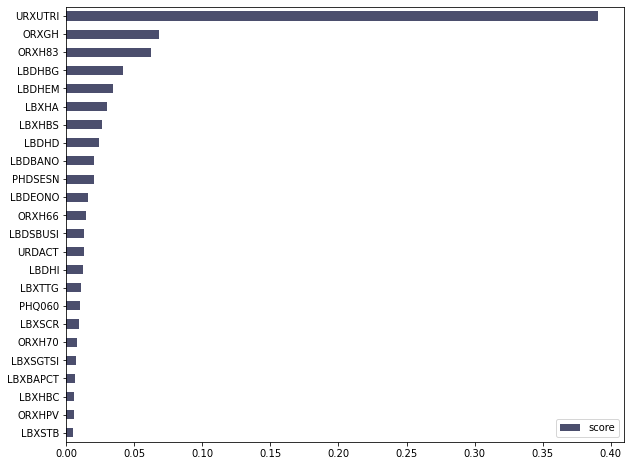

In [29]:
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)

# Features selected by XGBoost
keys = list(model.get_booster().feature_names)
values = list(model.feature_importances_)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 24 features
xgbfs_ = data[:24]

# Plot feature score
xgbfs_.sort_values(by='score').plot(kind='barh', figsize=(10, 8), color='#4B4E6D')


In [32]:
xgbfs_.reset_index()

index     score
0    URXUTRI  0.390184
1      ORXGH  0.067974
2     ORXH83  0.062002
3     LBDHBG  0.041439
4     LBDHEM  0.034602
5      LBXHA  0.029806
6     LBXHBS  0.026200
7      LBDHD  0.024167
8    LBDBANO  0.020769
9    PHDSESN  0.020376
10   LBDEONO  0.015820
11    ORXH66  0.014263
12  LBDSBUSI  0.013060
13    URDACT  0.013008
14     LBDHI  0.012266
15    LBXTTG  0.011181
16    PHQ060  0.010319
17    LBXSCR  0.009491
18    ORXH70  0.008095
19  LBXSGTSI  0.007202
20  LBXBAPCT  0.006215
21    LBXHBC  0.006039
22    ORXHPV  0.005467
23    LBXSTB  0.004986

# Merge SAS Labels from the codebook

In [33]:
xgbfs = xgbfs_.reset_index()
xgbfs.columns=['variable', 'score']

xgbfs['variable'] = xgbfs['variable'].apply(lambda x: x.upper())

xgbfs = pd.merge(left=xgbfs, right=codebook, left_on='variable', right_on='variable', how='left')
xgbfs

variable     score                               label
0    URXUTRI  0.390184                  Trichomonas, urine
1      ORXGH  0.067974       HPV High Globulin Band result
2     ORXH83  0.062002                         HPV Type 83
3     LBDHBG  0.041439         Hepatitis B surface antigen
4     LBDHEM  0.034602          Hepatitis E IgM (anti-HEV)
5      LBXHA  0.029806                Hepatitis A antibody
6     LBXHBS  0.026200        Hepatitis B Surface Antibody
7      LBDHD  0.024167              Hepatitis D (anti-HDV)
8    LBDBANO  0.020769    Basophils number (1000 cells/uL)
9    PHDSESN  0.020376    Session in which SP was examined
10   LBDEONO  0.015820  Eosinophils number (1000 cells/uL)
11    ORXH66  0.014263                         HPV Type 66
12  LBDSBUSI  0.013060        Blood urea nitrogen (mmol/L)
13    URDACT  0.013008     Albumin creatinine ratio (mg/g)
14     LBDHI  0.012266            HIV antibody test result
15    LBXTTG  0.011181    Tissue transglutaminase(IgA-TTG)
16    PHQ060  0.010319                Dietary supplements?
17    LBXSCR  0.009491                  Creatinine (mg/dL)
18    ORXH70  0.008095                         HPV Type 70
19  LBXSGTSI  0.007202    Gamma glutamyl transferase (U/L)
20  LBXBAPCT  0.006215               Basophils percent (%)
21    LBXHBC  0.006039           Hepatitis B core antibody
22    ORXHPV  0.005467                     Oral HPV Result
23    LBXSTB  0.004986             Total bilirubin (mg/dL)

In [34]:
# final variables
var_list = xgbfs.variable.tolist()
var_list.append('MCQ160F')
print(var_list)

['URXUTRI', 'ORXGH', 'ORXH83', 'LBDHBG', 'LBDHEM', 'LBXHA', 'LBXHBS', 'LBDHD', 'LBDBANO', 'PHDSESN', 'LBDEONO', 'ORXH66', 'LBDSBUSI', 'URDACT', 'LBDHI', 'LBXTTG', 'PHQ060', 'LBXSCR', 'ORXH70', 'LBXSGTSI', 'LBXBAPCT', 'LBXHBC', 'ORXHPV', 'LBXSTB', 'MCQ160F']


In [35]:
#final df
df_final = data_clean.filter(var_list)
df_final

URXUTRI     ORXGH    ORXH83   LBDHBG    LBDHEM     LBXHA    LBXHBS  \
0     1.982033  1.000000  2.000000  2.00000  2.000000  1.000000  1.000000   
1     2.000000  1.000000  2.000000  2.00000  2.000000  2.000000  2.000000   
2     1.982033  1.137712  2.066314  2.00000  2.000000  2.000000  2.000000   
3     1.982033  1.137712  2.066314  2.00000  2.000000  2.000000  2.000000   
4     2.000000  1.000000  2.000000  2.00000  2.000000  2.000000  2.000000   
...        ...       ...       ...      ...       ...       ...       ...   
5578  1.982033  1.000000  2.000000  2.00000  2.000000  1.000000  2.000000   
5579  1.982033  1.137712  2.066314  2.00000  1.000000  2.000000  2.000000   
5580  2.000000  3.000000  3.000000  1.99346  1.992345  1.540142  1.735201   
5581  2.000000  1.000000  2.000000  2.00000  2.000000  2.000000  2.000000   
5582  2.000000  1.000000  2.000000  2.00000  2.000000  1.000000  2.000000   

         LBDHD   LBDBANO  PHDSESN  ...    LBXTTG  PHQ060    LBXSCR   ORXH70  \
0     2.000000  0.100000      1.0  ...  2.000000     2.0  1.210000  2.00000   
1     2.000000  0.100000      2.0  ...  2.000000     2.0  0.790000  2.00000   
2     2.000000  0.100000      0.0  ...  2.000000     2.0  1.220000  2.06822   
3     2.000000  0.100000      0.0  ...  2.000000     2.0  0.730000  2.06822   
4     2.000000  0.100000      1.0  ...  2.000000     2.0  0.890000  2.00000   
...        ...       ...      ...  ...       ...     ...       ...      ...   
5578  2.000000  0.000000      0.0  ...  2.000000     2.0  0.810000  2.00000   
5579  2.000000  0.100000      1.0  ...  2.000000     2.0  1.290000  2.06822   
5580  1.996824  0.048083      1.0  ...  1.999812     2.0  0.916422  3.00000   
5581  2.000000  0.000000      0.0  ...  2.000000     2.0  1.100000  2.00000   
5582  2.000000  0.000000      1.0  ...  2.000000     2.0  0.820000  2.00000   

       LBXSGTSI  LBXBAPCT    LBXHBC    ORXHPV    LBXSTB  MCQ160F  
0     16.000000  1.200000  1.000000  2.000000  0.800000      1.0  
1     15.000000  0.600000  2.000000  2.000000  0.900000      0.0  
2     13.000000  0.900000  2.000000  1.995551  0.600000      0.0  
3     31.000000  1.400000  2.000000  1.995551  0.500000      0.0  
4     22.000000  0.900000  2.000000  2.000000  0.500000      0.0  
...         ...       ...       ...       ...       ...      ...  
5578  34.000000  0.400000  2.000000  2.000000  0.700000      0.0  
5579  11.000000  0.900000  2.000000  1.995551  0.500000      0.0  
5580  28.754274  0.745664  1.919716  3.000000  0.639103      0.0  
5581  30.000000  0.600000  2.000000  2.000000  0.900000      0.0  
5582  20.000000  0.600000  2.000000  2.000000  0.200000      0.0  

[5583 rows x 25 columns]

<AxesSubplot:>

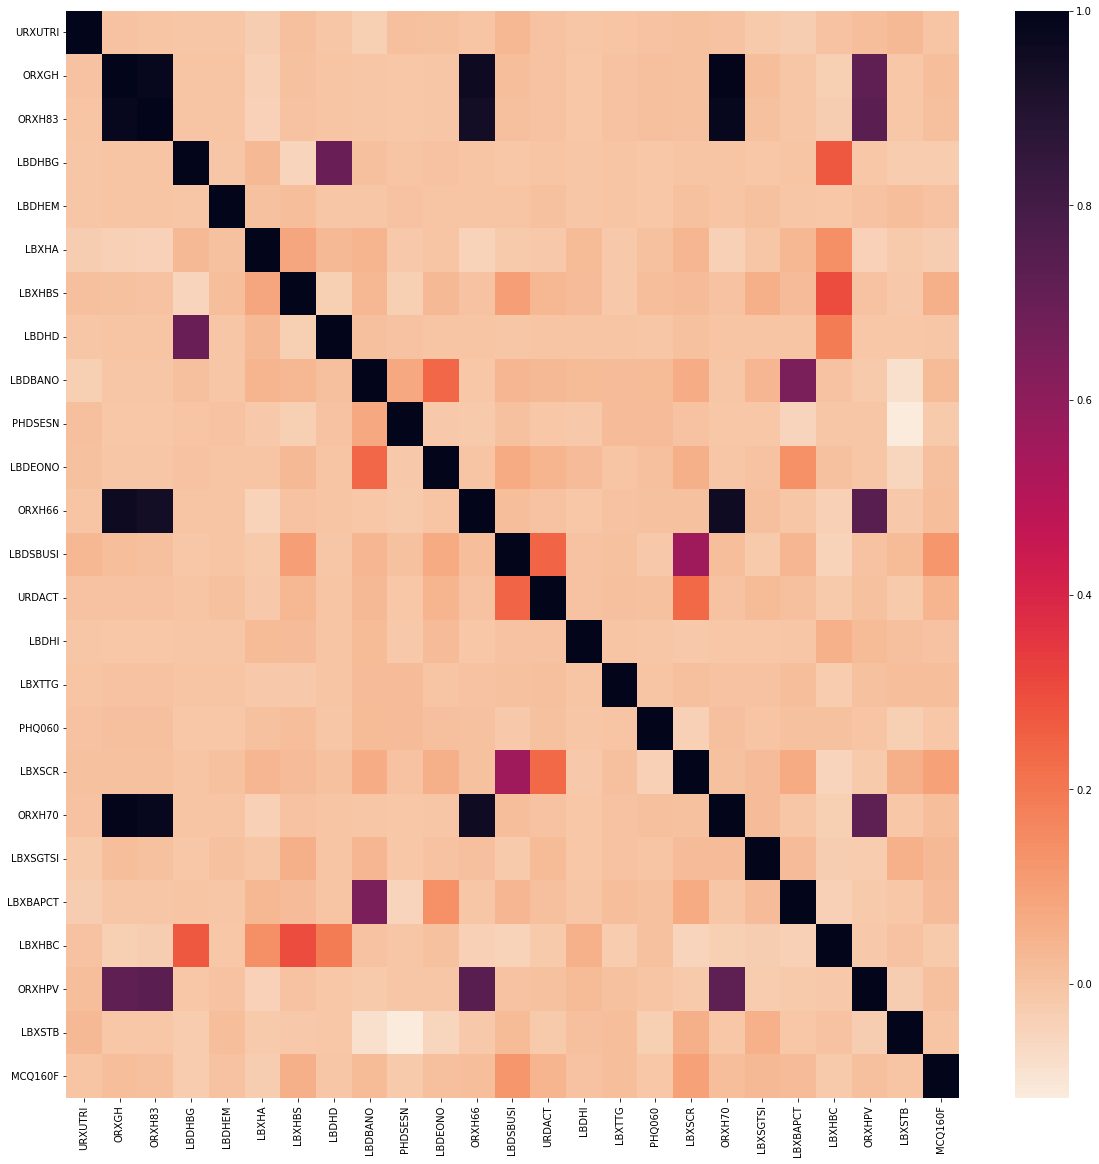

In [36]:
# sns.axes_style("white")
ax = plt.subplots(figsize=(20,20))

corr = df_final.corr()

# sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
sns.heatmap(corr, cmap=sns.cm.rocket_r)

# Train/Test Split

In [37]:
X_ = df_final.loc[:, df_final.columns != 'MCQ160F']
y = df_final.MCQ160F

**Data Normalization**

In [38]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X_), columns=X_.columns)
X

URXUTRI     ORXGH    ORXH83   LBDHBG    LBDHEM     LBXHA    LBXHBS  \
0     0.982033  0.000000  0.500000  1.00000  1.000000  0.000000  0.000000   
1     1.000000  0.000000  0.500000  1.00000  1.000000  1.000000  1.000000   
2     0.982033  0.068856  0.533157  1.00000  1.000000  1.000000  1.000000   
3     0.982033  0.068856  0.533157  1.00000  1.000000  1.000000  1.000000   
4     1.000000  0.000000  0.500000  1.00000  1.000000  1.000000  1.000000   
...        ...       ...       ...      ...       ...       ...       ...   
5578  0.982033  0.000000  0.500000  1.00000  1.000000  0.000000  1.000000   
5579  0.982033  0.068856  0.533157  1.00000  0.000000  1.000000  1.000000   
5580  1.000000  1.000000  1.000000  0.99346  0.992345  0.540142  0.735201   
5581  1.000000  0.000000  0.500000  1.00000  1.000000  1.000000  1.000000   
5582  1.000000  0.000000  0.500000  1.00000  1.000000  0.000000  1.000000   

         LBDHD   LBDBANO  PHDSESN  ...     LBDHI    LBXTTG  PHQ060    LBXSCR  \
0     1.000000  0.125000      0.5  ...  0.497511  0.500000     1.0  0.053185   
1     1.000000  0.125000      1.0  ...  0.500000  0.500000     1.0  0.028638   
2     1.000000  0.125000      0.0  ...  0.497511  0.500000     1.0  0.053770   
3     1.000000  0.125000      0.0  ...  0.497511  0.500000     1.0  0.025132   
4     1.000000  0.125000      0.5  ...  0.500000  0.500000     1.0  0.034483   
...        ...       ...      ...  ...       ...       ...     ...       ...   
5578  1.000000  0.000000      0.0  ...  0.497511  0.500000     1.0  0.029807   
5579  1.000000  0.125000      0.5  ...  0.497511  0.500000     1.0  0.057861   
5580  0.996824  0.060104      0.5  ...  0.497511  0.499906     1.0  0.036027   
5581  1.000000  0.000000      0.0  ...  0.500000  0.500000     1.0  0.046756   
5582  1.000000  0.000000      0.5  ...  0.500000  0.500000     1.0  0.030392   

       ORXH70  LBXSGTSI  LBXBAPCT    LBXHBC    ORXHPV    LBXSTB  
0     0.50000  0.007309  0.206897  0.000000  0.500000  0.100000  
1     0.50000  0.006645  0.103448  1.000000  0.500000  0.114286  
2     0.53411  0.005316  0.155172  1.000000  0.497775  0.071429  
3     0.53411  0.017276  0.241379  1.000000  0.497775  0.057143  
4     0.50000  0.011296  0.155172  1.000000  0.500000  0.057143  
...       ...       ...       ...       ...       ...       ...  
5578  0.50000  0.019269  0.068966  1.000000  0.500000  0.085714  
5579  0.53411  0.003987  0.155172  1.000000  0.497775  0.057143  
5580  1.00000  0.015784  0.128563  0.919716  1.000000  0.077015  
5581  0.50000  0.016611  0.103448  1.000000  0.500000  0.114286  
5582  0.50000  0.009967  0.103448  1.000000  0.500000  0.014286  

[5583 rows x 24 columns]

**Upsampling Minoroty Class with SMOTE**
Note that it is important to only oversample after train/test split, so the testing data will not leak.

In [39]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
# X_test_sm, y_test_sm = smote.fit_sample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
# X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [41]:
print('X train shape: ',X_train_sm.shape)
print('y train values: \n', y_train_sm.value_counts())
print()
print('X test shape: ',X_test.shape)
print('y test values: \n', y_test.value_counts())

X train shape:  (8066, 24)
y train values: 
 0.0    4033
1.0    4033
Name: MCQ160F, dtype: int64

X test shape:  (1396, 24)
y test values: 
 0.0    1356
1.0      40
Name: MCQ160F, dtype: int64


In [42]:
mscore = []

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=600, solver='lbfgs', class_weight='balanced', random_state=11).fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_test)

print('Accuracy Score:', clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Logistic Regression', clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.6568767908309455
Prediction: [0. 1. 0. ... 0. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79      1356
         1.0       0.05      0.55      0.08        40

    accuracy                           0.66      1396
   macro avg       0.51      0.61      0.44      1396
weighted avg       0.95      0.66      0.77      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         895         461
True[1]          18          22


Predict[0]  Predict[1]
True[0]         895         461
True[1]          18          22

**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11)
rnd_clf.fit(X_train_sm, y_train_sm)

y_pred = rnd_clf.predict(X_test)

print('Accuracy Score:', rnd_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Random Forest', rnd_clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.835243553008596
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      1356
         1.0       0.10      0.57      0.17        40

    accuracy                           0.84      1396
   macro avg       0.54      0.71      0.54      1396
weighted avg       0.96      0.84      0.89      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1143         213
True[1]          17          23


Predict[0]  Predict[1]
True[0]        1143         213
True[1]          17          23

**SVM**

In [45]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='sigmoid', gamma='auto', random_state=100)
svm_clf.fit(X_train_sm, y_train_sm)
y_pred = svm_clf.predict(X_test)

print('Accuracy Score:', svm_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['SVM', svm_clf.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.2636103151862464
Prediction: [0. 1. 0. ... 0. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.25      0.39      1356
         1.0       0.03      0.88      0.06        40

    accuracy                           0.26      1396
   macro avg       0.51      0.56      0.23      1396
weighted avg       0.96      0.26      0.38      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         333        1023
True[1]           5          35


Predict[0]  Predict[1]
True[0]         333        1023
True[1]           5          35

# V. Model Comparison

In [46]:
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

[['Random Forest', 0.835243553008596],
 ['Logistic Regression', 0.6568767908309455],
 ['SVM', 0.2636103151862464]]

Accuracy Score: 

Random Forest: 83.52%
Logistic Regression: 65.69%
SVM: 26.36%


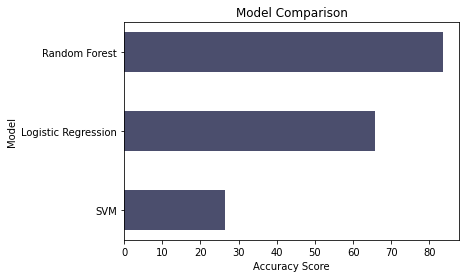

In [47]:
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accuracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')
  
 
# creating horizontal bar plot
plt.barh(model, score, height = 0.5, color='#4B4E6D') # this color is called independence, how cool!
 
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()

In [ ]:

# Overleaf Link:  https://www.overleaf.com/project/638b7227e0e24a089fed176a

    